In [1]:
%matplotlib widget

import ipywidgets
from ipywidgets import FloatSlider, Layout, interactive
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

# Datos de entrenamiento

$$\mathcal{D}_\text{train}$$

| $x$ | $y$ |
|-----|-----|
| 1   | 1   |
| 2   | 3   |
| 4   | 3   |

In [2]:
Dtrain = (
    (1, 1),
    (2, 3),
    (4, 3),
)

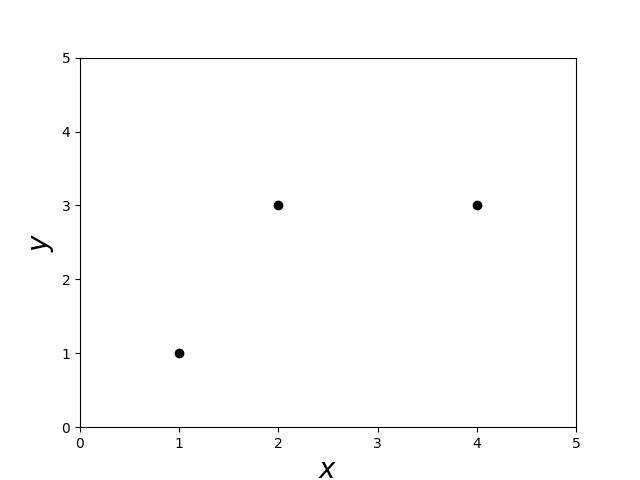

In [3]:
plt.close()

xmin, xmax = 0, 5
ymin, ymax = 0, 5

def plot_Dtrain(ax):
    xs, ys = [], []
    for x, y in Dtrain:
        xs.append(x)
        ys.append(y)
    return ax.scatter(xs, ys, c = "black")

plt.ioff()

fig = plt.figure();
ax = plt.axes();
plot_Dtrain(ax)
ax.set_xlabel("$x$", size=20)
ax.set_xlim((xmin, xmax))
ax.set_ylabel("$y$", size=20)
ax.set_ylim((ymin, ymax))
fig.canvas.header_visible = False

display(fig.canvas);

# Clase de hipótesis

Conjunto de funciones lineales.

$$\begin{aligned}
\mathcal{F} &= \left\{ f_{\mathbf{w}} : \mathbf{w} \in \mathbb{R}^2 \right\} \\
f_\mathbf{w}(x) &= \mathbf{w}\cdot\phi(x) \\
\phi(x) &= [1, x]
\end{aligned}$$

In [ ]:
def features(x):
    """
    Regresa el vector de características de la entrada x.
    """
    return [1, x]

In [ ]:
def predict(w, x):
    """
    Predice la salida de la entrada x con el predictor dado por el vector de pesos w.
    """
    return dotprod(w, features(x))

In [ ]:
def dotprod(v1, v2):
    """
    Calcula el producto punto entre los vectores v1 y v2.
    """
    return sum(c1 * c2 for c1, c2 in zip(v1, v2))

In [ ]:
plt.close()

xmin, xmax = 0, 5
ymin, ymax = 0, 5

def plot_model(ax, w):
    xs = [xmin, xmax]
    ys = [predict(w, x) for x in xs]
    return ax.plot(xs, ys, c = "blue")

plt.ioff()

w1_init, w1_min, w1_max, w1_step = 0.0, -5.0, 5.0, 0.1
w2_init, w2_min, w2_max, w2_step = 1.0, -10.0, 10.0, 0.01

w = [w1_init, w2_init]

def model_label(w1, w2):
    p1 = f"{w1:.2f}"
    p2 = f"{w2:+.2f}"
    return "$f_{\\mathbf{w}}(x) = " + p1 + p2 + "x$"

fig = plt.figure()
ax = plt.axes()
plot_Dtrain(ax)
lines = plot_model(ax, w)
model = ax.text(
    xmin + 0.1,
    ymax - 0.1,
    model_label(0.0, 0.0),
    size = 18,
    va = "top",
)
ax.set_xlabel("$x$", size=20)
ax.set_xlim((xmin, xmax))
ax.set_ylabel("$y$", size=20)
ax.set_ylim((ymin, ymax))
fig.canvas.header_visible = False

def update_plot(w1, w2):
    w = [w1, w2]
    xs = ax.get_xlim()
    ys = [predict(w, x) for x in xs]
    lines[0].set_data(xs, ys)
    model.set_text(model_label(w1, w2))
    fig.canvas.draw()
    fig.canvas.flush_events()

widget = interactive(
    update_plot,
    w1 = FloatSlider(
        orientation = "horizontal",
        description = "w1",
              value = w1_init,
                min = w1_min,
                max = w1_max,
               step = w1_step,
             layout = Layout(width='90%')
    ),
    w2 = FloatSlider(
        orientation = "horizontal",
        description = "w2",
              value = w2_init,
                min = w2_min,
                max = w2_max,
               step = w2_step,
             layout = Layout(width='90%')
    ),
)

display(widget)
display(fig.canvas)

# Función de pérdida

Pérdida cuadrática

$$\begin{aligned}
\text{Loss}(x, y, \mathbf{w}) &= (f_\mathbf{w}(x) - y)^2 \\
\text{TrainLoss}(\mathbf{w}) &= \frac{1}{|\mathcal{D}_\text{train}|} \sum_{(x, y)\in\mathcal{D}_\text{train}} \text{Loss}(x, y, \mathbf{w})
\end{aligned}$$

In [ ]:
def loss(x, y, w):
    """
    Calcula la pérdida cuadrática para la entrada x y salida y con respecto al
    predictor dado por el vector de pesos w.
    """
    return residual(x, y, w) ** 2

In [ ]:
def residual(x, y, w):
    """
    Calcula el residual entre la predicción para la entrada x con respecto al
    predictor dado por el vector de pesos w y la salida y.
    """
    return predict(w, x) - y

In [ ]:
def train_loss(Dtrain, loss, w):
    """
    Calcula la pérdida de entrenamiento para el predictor dado por el vector de
    pesos w.
    """
    examples = len(Dtrain)
    total = sum(loss(x, y, w) for x, y in Dtrain)
    return  total / examples

In [ ]:
plt.close()

xmin, xmax = 0, 5
ymin, ymax = 0, 5

def plot_residuals(ax, w):
    return [
        ax.plot([x, x], [y, predict(w, x)], c = "red")
        for x, y in Dtrain
    ]

plt.ioff()

w1_init, w1_min, w1_max, w1_step = 0.0, -5.0, 5.0, 0.1
w2_init, w2_min, w2_max, w2_step = 1.0, -10.0, 10.0, 0.01

w = [w1_init, w2_init]

def model_label(w1, w2):
    p1 = f"{w1:.2f}"
    p2 = f"{w2:+.2f}"
    return "$f_{\\mathbf{w}}(x) = " + p1 + p2 + "x$"

def train_loss_label(err):
    v = f"{err:.4f}"
    return "$\\mathrm{TrainLoss}(\\mathbf{w}) = "+v+"$"

fig = plt.figure()
ax = plt.axes()
plot_Dtrain(ax)
lines = plot_model(ax, w)
residuals = plot_residuals(ax, w)
model = ax.text(
    xmin + 0.1,
    ymax - 0.1,
    model_label(w1_init, w2_init),
    size = 18,
    va = "top",
)
error = ax.text(
    xmin + 0.1,
    ymax - 0.6,
    train_loss_label(train_loss(Dtrain, loss, w)),
    size = 18,
    va = "top",
)
ax.set_xlabel("$x$", size=20)
ax.set_xlim((xmin, xmax))
ax.set_ylabel("$y$", size=20)
ax.set_ylim((ymin, ymax))
fig.canvas.header_visible = False

def update_plot(w1, w2):
    w = [w1, w2]
    xs = ax.get_xlim()
    ys = [predict(w, x) for x in xs]
    tloss = train_loss(Dtrain, loss, w)
    lines[0].set_data(xs, ys)
    model.set_text(model_label(w1, w2))
    error.set_text(train_loss_label(tloss))
    for r, (x, y) in zip(residuals, Dtrain):
        r[0].set_data([x, x], [y, predict(w, x)])
    fig.canvas.draw()
    fig.canvas.flush_events()

widget = ipywidgets.interactive(
    update_plot,
    w1 = FloatSlider(
        orientation = "horizontal",
        description = "w1",
              value = w1_init,
                min = w1_min,
                max = w1_max,
               step = w1_step,
             layout = Layout(width='90%')
    ),
    w2 = FloatSlider(
        orientation = "horizontal",
        description = "w2",
              value = w2_init,
                min = w2_min,
                max = w2_max,
               step = w2_step,
             layout = Layout(width='90%')
    ),
)

display(widget)
display(fig.canvas)

In [ ]:
plt.close()

plt.ioff()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

def train_loss_w1w2(w1, w2):
    return train_loss(Dtrain, loss, [w1, w2])

train_loss_vec = np.vectorize(train_loss_w1w2)

w1_init, w1_min, w1_max, w1_step = 0.5, 0.0, 5.0, 0.1
w2_init, w2_min, w2_max, w2_step = 0.5, -1.0, 1.0, 0.01

w1 = np.linspace(w1_min, w1_max, 100)
w2 = np.linspace(w2_min, w2_max, 100)
X, Y = np.meshgrid(w1, w2)
Z = train_loss_vec(X, Y)

ax.plot_surface(
    X, Y, Z,
    cmap = cm.magma_r,
)
model3d = ax.plot(
    [w1_init],
    [w2_init],
    [train_loss_w1w2(w1_init, w2_init)],
    c = "blue",
    marker = "o",
    linestyle = "None",
)
ax.set_xlabel("$w_1$")
ax.set_ylabel("$w_2$")
ax.set_zlabel("$\\mathrm{TrainLoss}(\\mathbf{w})$")
ax.set_zlim((0, None))
ax.set_title(train_loss_label(train_loss_w1w2(w1_init, w2_init)))

fig.canvas.header_visible = False

def update_3dplot(w1, w2):
    tl = train_loss_w1w2(w1, w2)
    model3d[0].set_data_3d([w1], [w2], [tl])
    ax.set_title(train_loss_label(tl))
    fig.canvas.draw()
    fig.canvas.flush_events()

widget = ipywidgets.interactive(
    update_3dplot,
    w1 = FloatSlider(
        orientation = "horizontal",
        description = "w1",
              value = w1_init,
                min = w1_min,
                max = w1_max,
               step = w1_step,
             layout = Layout(width='90%')
    ),
    w2 = FloatSlider(
        orientation = "horizontal",
        description = "w2",
              value = w2_init,
                min = w2_min,
                max = w2_max,
               step = w2_step,
             layout = Layout(width='90%')
    ),
)

display(widget)

display(fig.canvas)

# Algoritmo de optimización

Descenso de gradiente

$$\mathbf{w} \gets \mathbf{w} - \eta \nabla_{\mathbf{w}} \mathrm{TrainLoss}(\mathbf{w})$$

$$\nabla_{\mathbf{w}}\mathrm{TrainLoss}(\mathbf{w}) = \frac{1}{|\mathcal{D}_{\text{train}}|} \sum_{(x, y)\in\mathcal{D}_{\text{train}}} 2(\mathbf{w}\dot\phi(x)-y)\phi(x)$$

In [ ]:
def train_loss(Dtrain, loss, w):
    """
    Calcula la pérdida de entrenamiento para el predictor dado por el vector de
    pesos w.
    """
    examples = len(Dtrain)
    total = sum(loss(x, y, w) for x, y in Dtrain)
    return  total / examples

In [ ]:
def train_loss_grad(Dtrain, loss, w):
    """
    Calcula el gradiente con respecto al predictor dado por el vector de pesos w
    de la pérdida de entrenamiento.
    """
    examples = len(Dtrain)
    grad = [0.0 for _ in w]
    for x, y in Dtrain:
        grad = vecsum(grad, vecscale(2*residual(x, y, w), features(x)))
    return vecscale(1 / examples, grad)

In [ ]:
def vecscale(k, v):
    """
    Regresa el vector v escalado en un factor de k.
    """
    return [k * c for c in v]

In [ ]:
def vecsum(v1, v2):
    """
    Regresa la suma de vectores entre v1 y v2.
    """
    return [c1 + c2 for c1, c2 in zip(v1, v2)]

In [ ]:
def gd_update(Dtrain, loss, w, eta):
    """
    Operación de actualización de pesos utilizando descenso de gradiente con un
    tamaño de paso eta.
    """
    return vecsum(w, vecscale(-eta, train_loss_grad(Dtrain, loss, w)))

In [ ]:
gd_log = True

def gd_show(t, w, tl, status):
    if not gd_log:
        return
    wstrs = [f"{c:+.5f}" for c in w]
    wstr = "[" + ", ".join(wstrs) + "]"
    if status == "init":
        s = "👣"
    elif status == "inc":
        s = "⚠️"
    elif status == "dec":
        s = "✅"
    print(f"t = {t:<4} w = {wstr:<19} TrainLoss = {tl:<10.8f} {s}")

In [ ]:
def gd_iter(Dtrain, loss, w_init, eta, T, eps = 1e-8):
    """
    Algoritmo iterativo de descenso de gradiente con un tamaño de paso eta y
    realizando T épocas.
    """
    w = w_init
    tl = train_loss(Dtrain, loss, w)
    gd_show(0, w, tl, "init")
    for t in range(1, T+1):
        w = gd_update(Dtrain, loss, w, eta)
        new_tl = train_loss(Dtrain, loss, w)
        gd_show(t, w, tl, "inc" if new_tl > tl else "dec")
        if abs(tl - new_tl) < eps:
            break
        tl = new_tl
    return w, tl

In [ ]:
best_w, min_tl = gd_iter(Dtrain, loss, [0, 0], 0.1, 1000)

In [ ]:
plt.close()

xmin, xmax = 0, 5
ymin, ymax = 0, 5

def plot_residuals(ax, w):
    return [
        ax.plot([x, x], [y, predict(w, x)], c = "red")
        for x, y in Dtrain
    ]

plt.ioff()

w1_init, w1_min, w1_max, w1_step = best_w[0], -5.0, 5.0, 0.1
w2_init, w2_min, w2_max, w2_step = best_w[1], -10.0, 10.0, 0.01

w = [w1_init, w2_init]

def model_label(w1, w2):
    p1 = f"{w1:.2f}"
    p2 = f"{w2:+.2f}"
    return "$f_{\\mathbf{w}}(x) = " + p1 + p2 + "x$"

def train_loss_label(err):
    v = f"{err:.4f}"
    return "$\\mathrm{TrainLoss}(\\mathbf{w}) = "+v+"$"

fig = plt.figure()
ax = plt.axes()
plot_Dtrain(ax)
lines = plot_model(ax, w)
residuals = plot_residuals(ax, w)
model = ax.text(
    xmin + 0.1,
    ymax - 0.1,
    model_label(w[0], w[1]),
    size = 18,
    va = "top",
)
error = ax.text(
    xmin + 0.1,
    ymax - 0.6,
    train_loss_label(min_tl),
    size = 18,
    va = "top",
)
ax.set_xlabel("$x$", size=20)
ax.set_xlim((xmin, xmax))
ax.set_ylabel("$y$", size=20)
ax.set_ylim((ymin, ymax))
fig.canvas.header_visible = False

display(fig.canvas)

# Problema

Crea una visualización interactiva de la pérdida de entrenamiento a través de las épocas del descenso de gradiente (con $T = 100$) a partir de un predictor inicial $\mathbf{w}$ (ajustable) y un tamaño de paso $\eta$ (ajustable).